In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import scipy.stats as stats
import scipy.optimize as opt
import scipy.special as spl
from scipy.special import beta
import scipy.integrate as intgr
import math
import pandas as pd

# MLE Problem Set

# Problem 1

Problem 1 a)

Summary Statistics
mean:  720.2779753272437 median:  172.21 maximum:  227967.25 minimum:  0.01 Standard Deviation:  3972.663756393663


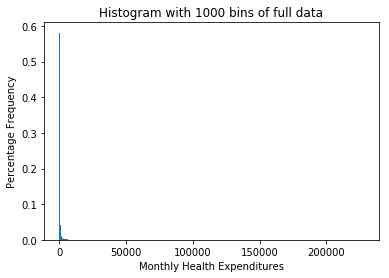

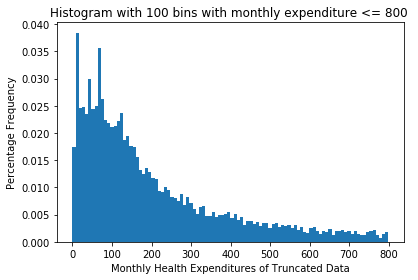

The sum of heights of bins of the truncated distribution is:  0.8494208494208465
The second histogram is a much better visualisation of the distribution of data as very few observations lie outside the limit of 800.


In [3]:
data = np.loadtxt('clms.txt')
data_mean = np.mean(data)
data_median = np.median(data)
data_maximum = np.max(data)
data_minimum = np.min(data)
data_std = np.std(data)
print('Summary Statistics')
print('mean: ', data_mean, 'median: ', data_median, 'maximum: ', data_maximum, 'minimum: ', data_minimum, 'Standard Deviation: ', data_std)

weights = (1/int(len(data)))*np.ones(len(data))
n1, bin_cuts1, patches1 = plt.hist(data, 1000, weights= weights)
plt.title('Histogram with 1000 bins of full data')
plt.xlabel('Monthly Health Expenditures')
plt.ylabel('Percentage Frequency')
plt.show()

#Masking the data so that values more than 800 are masked off
data_trunc = ma.masked_greater(data,800)
weights2 = (1/int(len(data_trunc)))*np.ones(len(data_trunc))
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, weights=weights2)
plt.title('Histogram with 100 bins with monthly expenditure <= 800 ')
plt.xlabel('Monthly Health Expenditures of Truncated Data')
plt.ylabel('Percentage Frequency')
plt.tight_layout()
plt.show()
print('The sum of heights of bins of the truncated distribution is: ', n2.sum())
print('The second histogram is a much better visualisation of the distribution of data as very few observations lie outside the limit of 800.')


Problem 1 b)

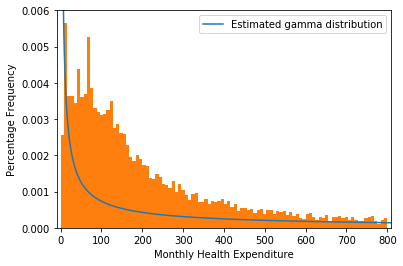

In [108]:
#MLE Estimator- Gamma Distribution

def trunc_gamma_pdf(xvals, alpha, beta):        
    pdf_vals = ((xvals)**(alpha-1))*(np.exp(-(xvals/beta)))/((beta**alpha)*math.gamma(alpha))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = trunc_gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GA(data):
    mean = np.mean(data)
    var = np.var(data)
    beta_init = var / mean
    alpha_init = mean / beta_init
    params_init = np.array([alpha_init, beta_init])
    mle_args = data
    results_uncstr = opt.minimize(crit, params_init, args=(mle_args), method= "L-BFGS-B", bounds = ((1e-5,None),((1e-5,None))))
    alpha_MLE, beta_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return alpha_MLE, beta_MLE, log_likelihood

alpha_MLE, beta_MLE, log_likelihood= GA(data)
x_dom= np.linspace(1,len(data), len(data))
pdf = trunc_gamma_pdf(x_dom, alpha_MLE, beta_MLE)
plt.plot(x_dom, pdf, label='Estimated gamma distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()




Problem 1 c)

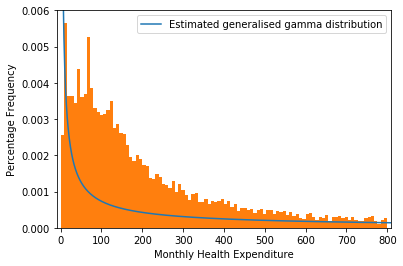

In [106]:
#Generalised Gamma Distribution

alpha_init= 0.2217553188239722
beta_init= 21911.06469927622

def trunc_gen_gamma_pdf(xvals, alpha, beta, m):        
    pdf_vals = m*((xvals)**(alpha-1))*(np.exp(-((xvals/beta)**m)))/((beta**alpha)*math.gamma(alpha/m))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_gamma_gen(xvals, alpha, beta, m):
    pdf_vals = trunc_gen_gamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gamma(params, *args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gamma_gen(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GG(data):
    params_init = np.array([alpha_init, beta_init, 1])
    mle_args = data
    results_uncstr = opt.minimize(crit_gamma, params_init, args=(mle_args),
                                  method = "L-BFGS-B", bounds = ((1e-10,None),(1e-10,None),(1e-10, None)))
    alpha_MLE, beta_MLE, m_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return alpha_MLE, beta_MLE, m_MLE, log_likelihood

alpha_MLE, beta_MLE, m_MLE, log_likelihood = GG(data)
x_dom= np.linspace(1,len(data), len(data))
pdf = trunc_gen_gamma_pdf(x_dom, alpha_MLE, beta_MLE, m_MLE)
plt.plot(x_dom, pdf, label='Estimated generalised gamma distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()

    
    

Problem 1 d)

0.09970665447367526 4450472.61330842 60.9796264230272 166.09988119890002 74874.31496702053


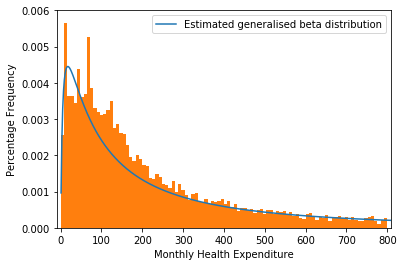

In [95]:
#2GB2 Distribution

#From previous estimation
alpha_init= 0.22173770055937686  
beta_init= 21911.064427545673 
m_init=  0.9970912437475302


#Setting initial parameters of 2GB2
q_init = 200
a_init = m_init
b_init = (q_init**(1/m_init))*beta_init
p_init = alpha_init/m_init


def gen_beta_pdf(xvals, a, b, p, q):        
    pdf_vals = a*(xvals**(a*p-1))/(b**(a*p)*beta(p,q)*(1+(xvals/b)**a)**(p+q))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_beta(xvals, a, b, p, q):
    pdf_vals = gen_beta_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_beta(params, *args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_beta(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GB(data):
    params_init = np.array([a_init, b_init, p_init, q_init])
    mle_args = data
    results_uncstr = opt.minimize(crit_beta, params_init, args=(mle_args),
                                  method = "L-BFGS-B", bounds = ((1e-5,None),(1e-5,None),
                                                                 (1e-5, None),(1e-5, None)))
    a_MLE, b_MLE, p_MLE, q_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood

a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood= GB(data)
print(a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood)
x_dom= np.linspace(1,len(data), len(data))
pdf = gen_beta_pdf(x_dom, a_MLE, b_MLE, p_MLE, q_MLE)
plt.plot(x_dom, pdf, label='Estimated generalised beta distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()

Problem 1 e) 

In [110]:
alpha_MLE_b, beta_MLE_b, log_likelihood_b= GA(data)
alpha_MLE_c, beta_MLE_c, m_MLE_c, log_likelihood_c = GG(data)
a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d, log_likelihood_d= GB(data)

# Likelihood ratio test of part b) vs part d) 
log_lik_h0 = log_likelihood_d
log_lik_mle = log_likelihood_b
log_lik_mle2 = log_likelihood_c
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value (Part b vs Part d) = ', pval_h0)


# Likelihood ratio test of part c) vs part d) 
LR_val2 = 2 * (log_lik_mle2 - log_lik_h0)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val2, 2)
print('chi squared of H0 with 2 degrees of freedom p-value (Part c vs Part d) = ', pval_h0)


chi squared of H0 with 2 degrees of freedom p-value (Part b vs Part d) =  0.0
chi squared of H0 with 2 degrees of freedom p-value (Part c vs Part d) =  0.0


Problem 1 f)

In [124]:
a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d, log_likelihood_d= GB(data)
alpha_MLE_b, beta_MLE_b, log_likelihood_b= GA(data)


prob_beta = intgr.quad(gen_beta_pdf, 1000, np.inf, args=(a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d))
prob_gamma = intgr.quad(trunc_gamma_pdf, 1000, np.inf, args= (alpha_MLE_b, beta_MLE_b))

print('Probability of claim greater than $1000 under Beta distribution: ', prob_beta[0])
print('Probability of claim greater than $1000 under Gamma distribution: ', prob_gamma[0])


Probability of claim greater than $1000 under Beta distribution:  0.12848854805896373
Probability of claim greater than $1000 under Gamma distribution:  0.4519597383707461


# Problem 2

Problem 2 a)

In [246]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 

def get_z(alpha,w,k):
    return np.log(1/(1-alpha)* w * (k**(-alpha)))

def get_like(params, *args):
    w,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,w,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.5
mu_init = 9  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
w = np.ravel(np.array(mac_data[['w']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (w, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x
log_likelihood = results_uncstr.fun
print('Inverse Hessian is: ',results_uncstr.hess_inv)
print('alpha_MLE:', alpha_MLE, 'rho_MLE: ', rho_MLE, 'mu_MLE: ', mu_MLE,'sig_MLE:', sig_MLE)
print('log likelihood: ', -log_likelihood)



Inverse Hessian is:  [[ 4.70183413e-05  3.27433841e-04 -4.45837457e-04  1.67283314e-05]
 [ 3.27433841e-04  3.51691732e-03 -4.74292151e-03  1.17756823e-04]
 [-4.45837457e-04 -4.74292151e-03  6.42191238e-03 -1.46531980e-04]
 [ 1.67283314e-05  1.17756823e-04 -1.46531980e-04  4.25056059e-05]]
alpha_MLE: 0.5533939681361759 rho_MLE:  0.8246566377654961 mu_MLE:  8.10668349893346 sig_MLE: 0.09278026057620306
log likelihood:  95.8582756898303


Problem 2 b)

In [247]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 

def get_z(alpha,r,k):
    z= np.log((r*(k)**(1-alpha))/alpha)
    return z

def get_like(params, *args):
    r,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,r,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.8
mu_init = 8  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
r = np.ravel(np.array(mac_data[['r']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (r, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x
log_likelihood = results_uncstr.fun
print(results_uncstr.hess_inv)
print('alpha_MLE:', alpha_MLE, 'rho_MLE: ', rho_MLE, 'mu_MLE: ', mu_MLE,'sig_MLE:', sig_MLE)
print('log likelihood: ', -log_likelihood)


[[ 6.99956986e-06 -1.95006829e-06 -6.03846036e-06  2.93898980e-06]
 [-1.95006829e-06  1.43003071e-05 -8.39280532e-06 -1.82573244e-05]
 [-6.03846036e-06 -8.39280532e-06  3.18783773e-05 -9.05410544e-06]
 [ 2.93898980e-06 -1.82573244e-05 -9.05410544e-06  4.26296998e-05]]
alpha_MLE: 0.5533884718372466 rho_MLE:  0.8246599273918177 mu_MLE:  7.569612222432442 sig_MLE: 0.09278026108109927
log likelihood:  95.85827568678722


Problem 2 c)

In [250]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 

def get_z(alpha,r,k):
    z= np.log((r*(k)**(1-alpha))/alpha)
    return z

def get_like(params, *args):
    r,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,r,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.8
mu_init = 8  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
r = np.ravel(np.array(mac_data[['r']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (r, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x

z_star = (1-alpha_MLE)*np.log(7500000) - np.log(alpha_MLE)
mean_dist = rho_MLE*10 + (1-rho_MLE)*mu_MLE

def pdf_partc(x, mean, sigma):
    pdf = stats.norm.pdf(x, mean, sigma)
    return pdf
    
    
prob_greater = intgr.quad(pdf_partc, z_star, np.inf, args=(mean_dist, sig_MLE))
print('The probability is: ', prob_greater)

The probability is:  (0.9999999999999996, 4.680326606153411e-09)


# Problem 3

Problem 3 a)

Text(0.5,1,'Income distribution in U.S')

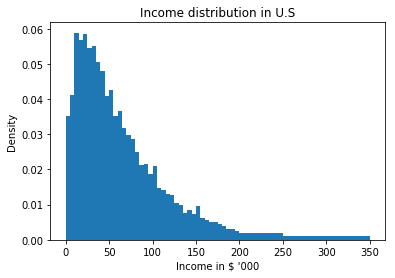

In [23]:
data = pd.read_table("usincmoms.txt", header = None)
data.columns = ["Percent", "Midpoint"]
data.Midpoint = data.Midpoint/1000
weights = np.copy(data.Percent)
weights[40] = weights[40]/10
weights[41] = weights[41]/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, weights=weights)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")


Problem 3 b)

In [21]:
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))


(42,)